# Lasso Regresyon Modeli

### Gerekli Kütüphaneler

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [7]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.linear_model import RidgeCV , LassoCV
from sklearn.model_selection import cross_val_score

#### Veri Seti

In [4]:
df = pd.read_csv("Hitters.csv")

df = df.dropna()

dms = pd.get_dummies(df[["League" , "Division" , "NewLeague" ] ])

y = df["Salary"]
X_ = df.drop(["Salary" , "League" , "Division" , "NewLeague"] , axis=1).astype("float64")

#bağımsız değişkenler
X = pd.concat([X_ , dms[["League_N" , "Division_W" , "NewLeague_N"]]], axis=1)

X_train , X_test , y_train , y_test = train_test_split(X,
                                                       y,
                                                       test_size=0.25,
                                                       random_state=42)

In [5]:
df.shape

(263, 20)

In [6]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


amacımız beyzbol oyuncularının maaşlarını tahmin etmek

In [21]:
#model kurma
lasso_model=Lasso().fit(X_train , y_train)

In [9]:
lasso_model.intercept_

-5.5874506773361645

In [10]:
lasso_model.coef_

array([-1.74875691e+00,  8.59204135e+00,  6.67993798e+00, -3.06715333e+00,
       -1.91843070e+00,  5.32372890e+00,  8.39184117e+00, -1.63172447e-01,
       -8.22311277e-02, -3.93602861e-01,  1.71118530e+00,  6.55730545e-01,
       -6.48379405e-01,  2.59815358e-01,  2.73041157e-01, -4.41440454e-01,
        8.54474011e+01, -9.59701213e+01, -2.13086605e+01])

In [14]:
#farklı lambda değerlerine karşılık katsayılar

lasso = Lasso()
coefs = []

alphas = np.random.randint(0,100000,10)

for a in alphas:
    lasso.set_params(alpha = a)
    lasso.fit(X_train , y_train)
    coefs.append(lasso.coef_)

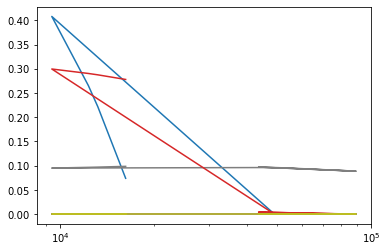

In [15]:
ax = plt.gca()
ax.plot(alphas,coefs)
ax.set_xscale("log")

lassoda parametre değerleri arttıkça sıfır oluyor fakat ridge de 0'a yaklaşıyordu

In [16]:
lasso = Lasso()
coefs = []

alphas2 = 10**np.linspace(10,-2,100)*0.5

for a in alphas2:
    lasso.set_params(alpha = a)
    lasso.fit(X_train , y_train)
    coefs.append(lasso.coef_)

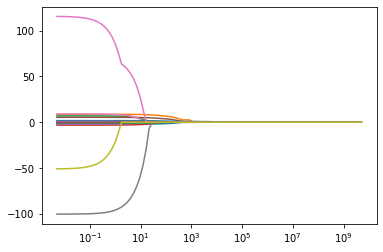

In [17]:
ax = plt.gca()
ax.plot(alphas2,coefs)
ax.set_xscale("log")

yukarıda da görüldüğü üzere giderek 0a yaklaşan ve sonunda da değerleri 0 a eşit olan bir grafik

### Tahmin

verisetini train ve test olarak ikiye ayırdım. iki ayrı veri setim var. bu veri setlerinde ise hem bağımlı hem bağımsız değişkenler var.

In [18]:
lasso_model

Lasso()

In [19]:
lasso_model.predict(X_train)[0:5]

array([377.26270596, 786.51524513, 495.14140718, 117.19492966,
       429.04228506])

In [20]:
lasso_model.predict(X_test)[0:5]

array([ 609.18826367,  696.96810702, 1009.06157391,  412.22773375,
        409.25851712])

In [22]:
y_pred = lasso_model.predict(X_test)

In [23]:
np.sqrt(mean_squared_error(y_test, y_pred))

356.09758845540347

lasso ridge regresyona göre daha düşük bir hata verdi. 

ridge --> 356.858304727152


lasso --> 356.09758845540347


In [25]:
#bağımsız değişkenlerce bağımlı değişkenlerdeki değişikliğin açıklanma yüzdesi
r2_score(y_test, y_pred)

0.41422798132366134

### Model Tuning

In [37]:
lasso_cv_model = LassoCV(cv = 10 , max_iter=100000).fit(X_train , y_train)

In [38]:
lasso_cv_model.alpha_

563.4670501833854

In [39]:
lasso_tuned = Lasso().set_params(alpha = lasso_cv_model.alpha_).fit(X_train, y_train)

In [40]:
lasso_tuned = Lasso(alpha= lasso_cv_model.alpha_).fit(X_train, y_train)

In [41]:
y_pred = lasso_tuned.predict(X_test)

In [42]:
np.sqrt(mean_squared_error(y_test, y_pred))

373.5957225069794

In [46]:
#lambda değerleri girerek
lasso_cv_model2 = LassoCV(alphas = alphas2 , cv = 10 , max_iter=100000).fit(X_train , y_train)

In [47]:
lasso_cv_model2.alpha_

201.85086292982749

In [52]:
lasso_tuned2 = Lasso(alpha= lasso_cv_model2.alpha_).fit(X_train, y_train)

In [53]:
y_pred = lasso_tuned2.predict(X_test)

In [54]:
np.sqrt(mean_squared_error(y_test, y_pred))

363.6832708037447

In [57]:
pd.Series(lasso_tuned2.coef_ , index = X_train.columns)

AtBat         -1.052276
Hits           5.342648
HmRun          0.000000
Runs           0.000000
RBI            0.000000
Walks          2.640006
Years          0.000000
CAtBat        -0.174125
CHits          0.249805
CHmRun        -0.000000
CRuns          1.035075
CRBI           0.469281
CWalks        -0.186771
PutOuts        0.272541
Assists        0.170528
Errors        -0.000000
League_N       0.000000
Division_W    -0.000000
NewLeague_N    0.000000
dtype: float64